# Import Package

In [1]:
# Import packages
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, r2_score
%matplotlib inline

# Load Data

In [2]:
# Load the dataset
data_path = os.path.join(os.getcwd(), 'datasets', 'regression_part1.csv')
reg = pd.read_csv(data_path, delimiter = ',')

In [3]:
# data size
reg.shape

(50, 2)

In [4]:
# data range
# reg.describe()
# reg

In [12]:
# data type
# reg['exam_score']

# Fit a linear model

[17.89768026  1.44114091]
y=1.4411*x+17.8977
Score 0.9277934754398822


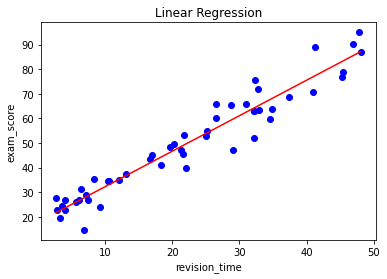

In [5]:
# 
x_l = list(reg['revision_time'])
y_true = list(reg['exam_score'])
x_true = []
for i in range(len(x_l)):
    x_true.extend([[1, x_l[i]]])

lr = LinearRegression(fit_intercept=False).fit(x_true, y_true)
print(lr.coef_)   # coefient
y_pred = lr.predict(x_true)

# coef_是系数，intercept_是截距
a1 = lr.coef_[1]
b = lr.coef_[0]
print("y=%.4f*x+%.4f" % (a1,b))

# 对回归模型进行评分，这里简单使用训练集进行评分，实际很多时候用其他的测试集进行评分
print("Score", lr.score(x_true, y_true))
 
# 简单画图显示
plt.scatter(x_l, y_true, c="blue")
plt.plot(x_l, y_pred, c="red")
plt.xlabel('revision_time')
plt.ylabel('exam_score')
plt.title('Linear Regression')
plt.show()

In [6]:
# MSE linear model
mse_l = np.sum((y_pred-y_true)**2) / len(y_true)
print(mse_l)

30.98547261454129


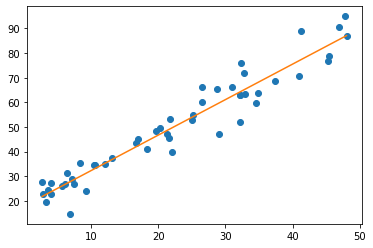

In [7]:
# numpy
poly = np.polyfit(x_l, y_true,deg=1)
y_pred = np.polyval(poly, x_l)


plt.plot(x_l, y_true, 'o')
plt.plot(x_l, y_pred)
 
plt.show()


In [16]:
# mse n
mse_n = np.sum((y_pred-y_true)**2) / len(y_true)
print(mse_n)

30.98547261454129


# MSE which is related to w1

32.48096161535148
1.3535353535353538


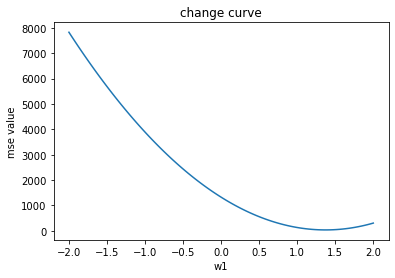

In [26]:
#
mse_list = []
w0 = 20
w1 = np.linspace(-2, 2, 100)
y_l = []
for i in range(len(w1)):
    y_l = []
    for j in range(len(x_l)):
        a = w0 + w1[i]*x_l[j]
        y_l.extend([a])
    a_sum = 0
    for m in range(len(y_true)):
        a_sum = a_sum + (y_l[m]-y_true[m])**2
    mse_l = a_sum / len(y_true)
    # mse_l = np.sum((y_l-y_true)**2) / len(y_true)
    mse_list.extend([mse_l])
print(min(mse_list))
for i in range(len(mse_list)):
    if (mse_list[i] == min(mse_list)):
        print(w1[i])
plt.plot(w1, mse_list)
plt.xlabel("w1")
plt.ylabel("mse value")
plt.title("change curve")
plt.show()